# Project Outline

# Introduction
This project aims to demonstrate proficiency in conducting Exploratory Data Analysis (EDA) using Python, specifically with Pandas and NumPy, and to create insightful visualizations. Additionally, we will apply Machine Learning algorithms to the selected dataset to derive meaningful insights and communicate them effectively.


# Dataset Selection
The dataset selected for this project is the Diabetes dataset. This dataset contains multiple columns with information on various medical predictors and the target variable indicating the presence or absence of diabetes.

- **Dataset Name:** Diabetes.csv
- **Number of Columns:** 10
- **Number of Records:** Over 5000


# Data Cleaning and Preprocessing

## Importing Libraries and Dataset
```python



In [105]:
import pandas as pd

df = pd.read_csv('Diabetes.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


# Handling Missing Data


In [106]:
df.isnull().sum()  # Check for missing values

# Imputation strategy (e.g., filling missing values with mean)
df.fillna(df.mean(), inplace=True)


# Detect and Address Outliers

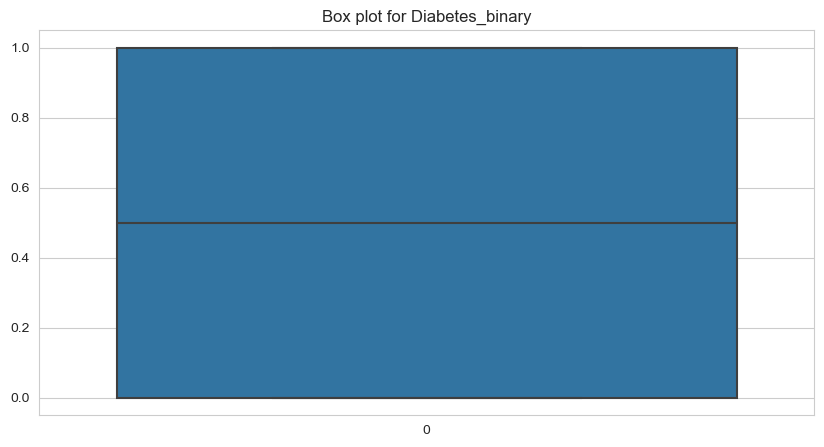

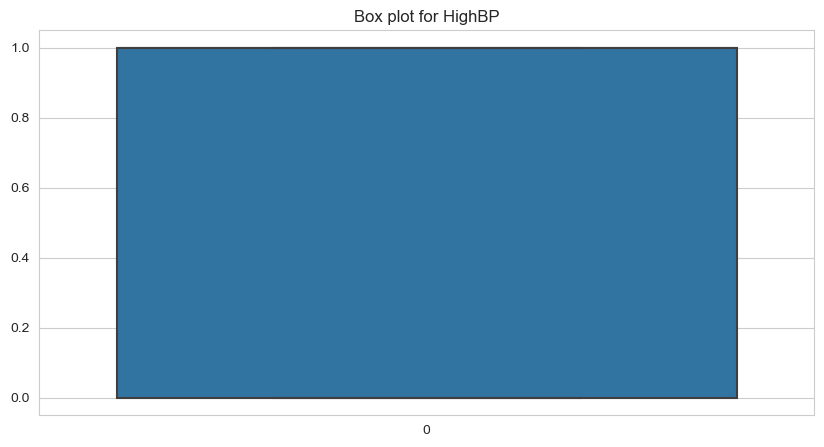

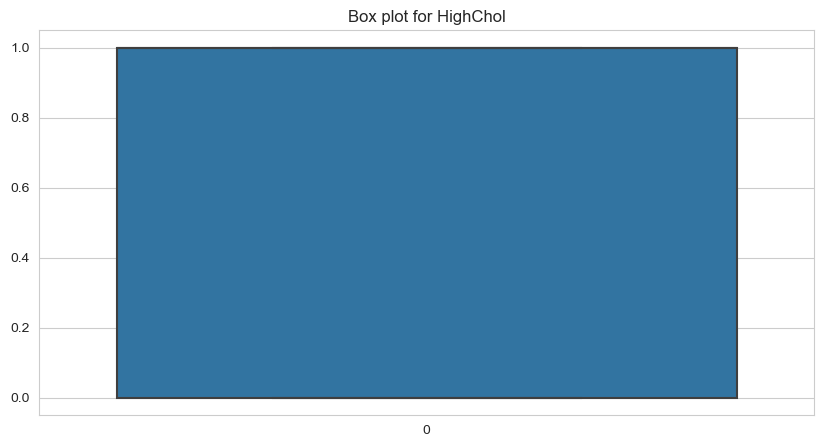

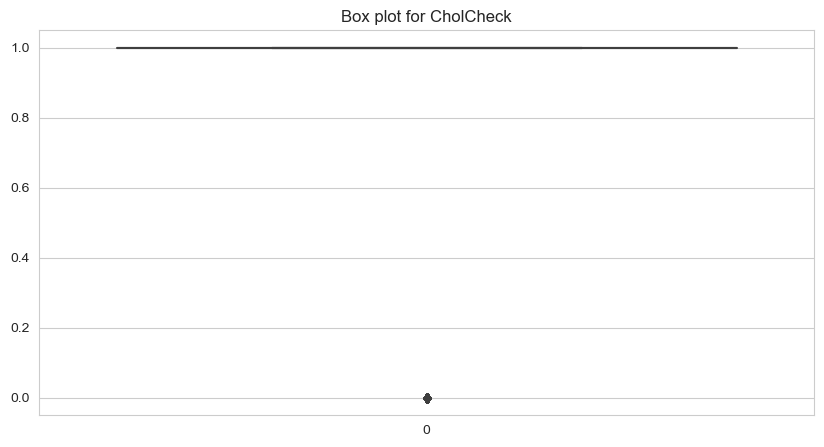

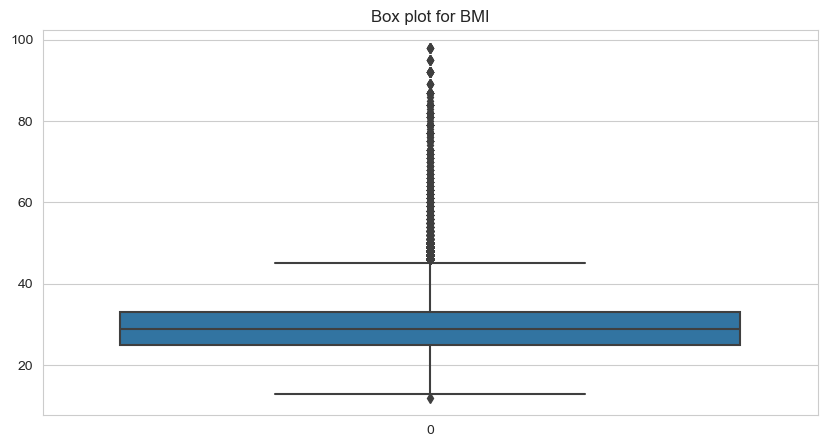

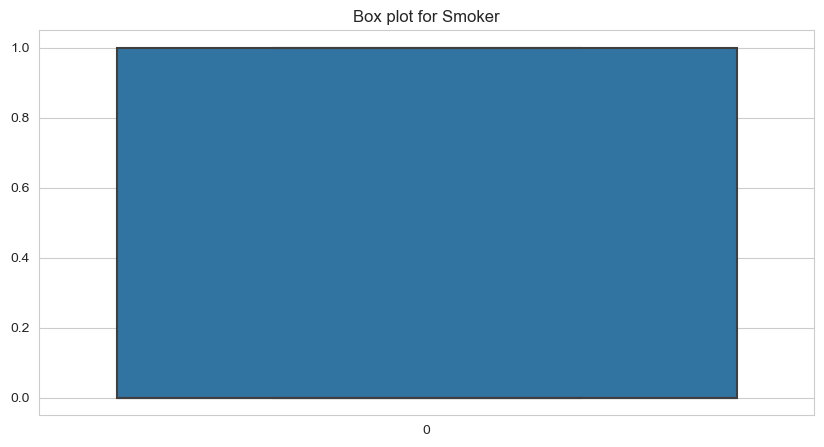

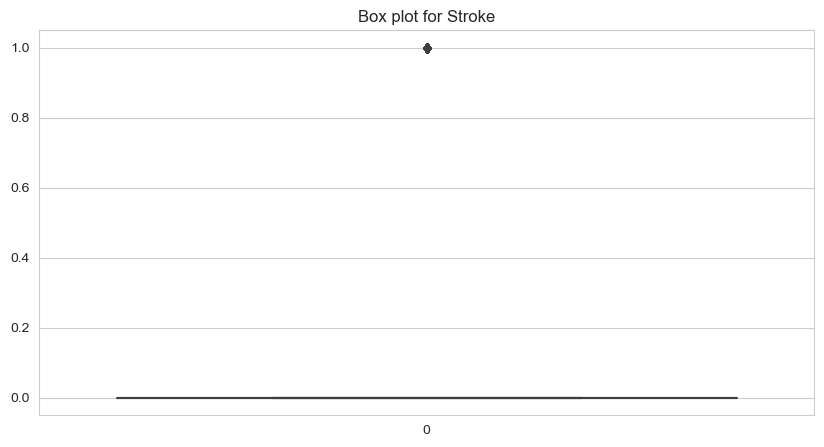

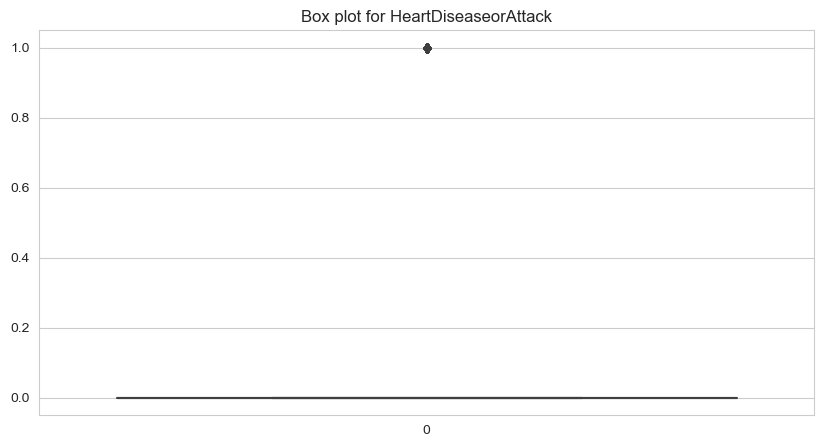

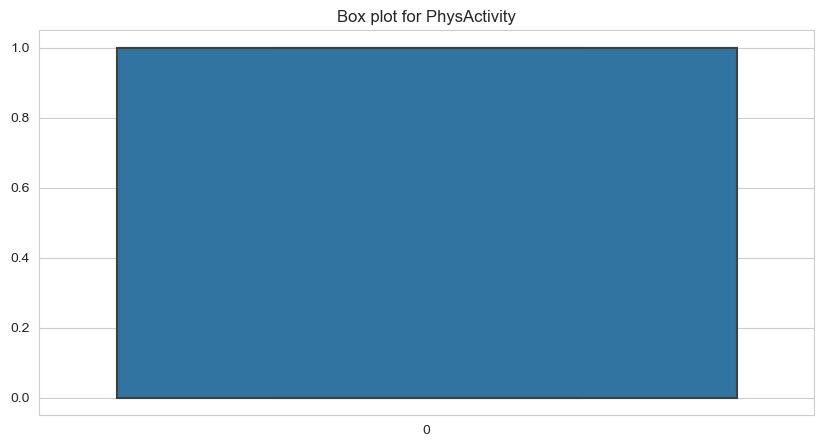

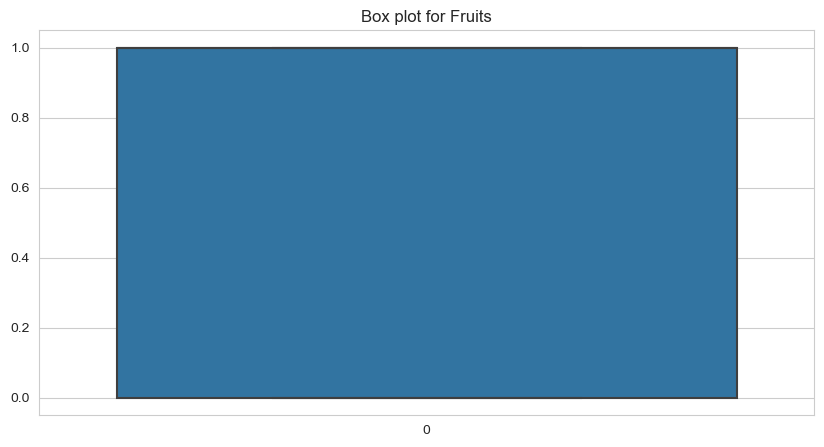

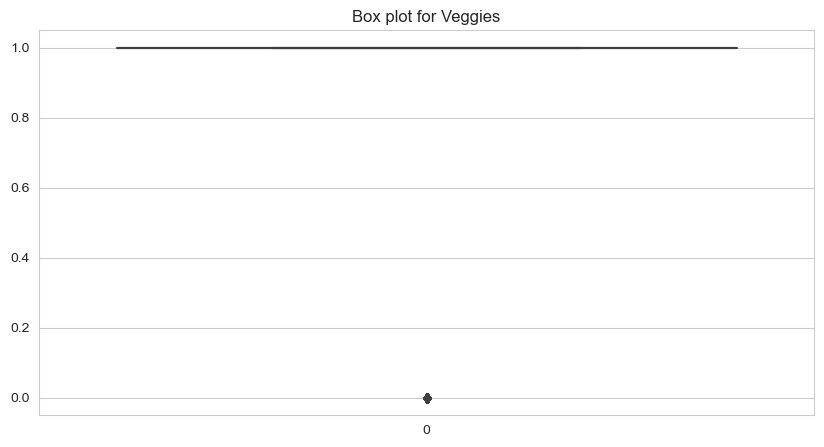

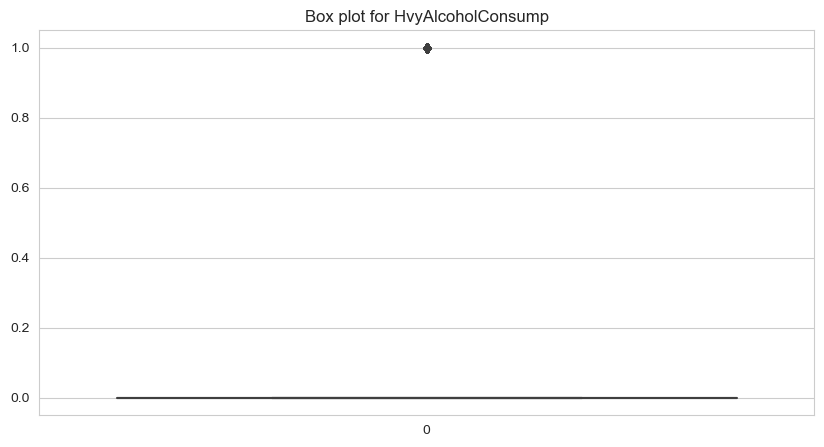

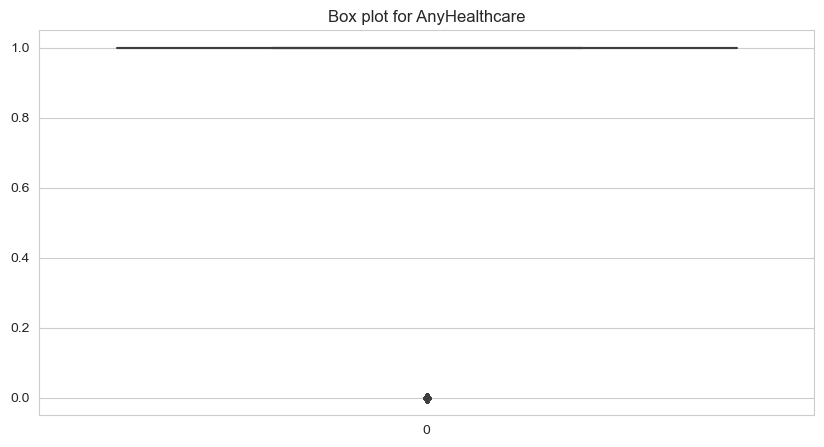

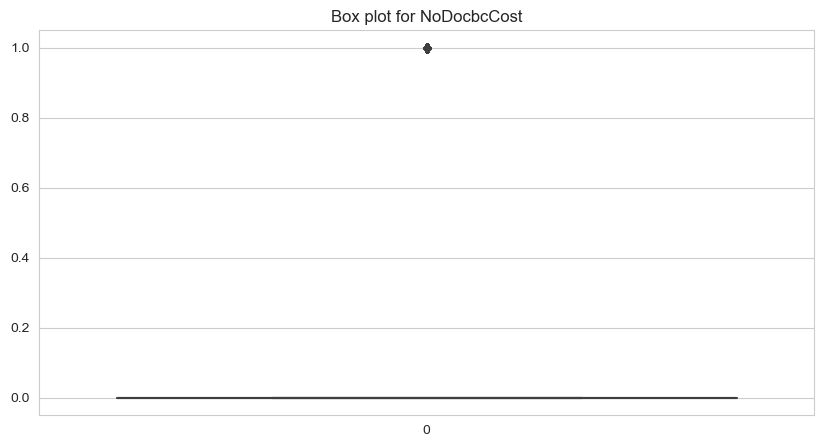

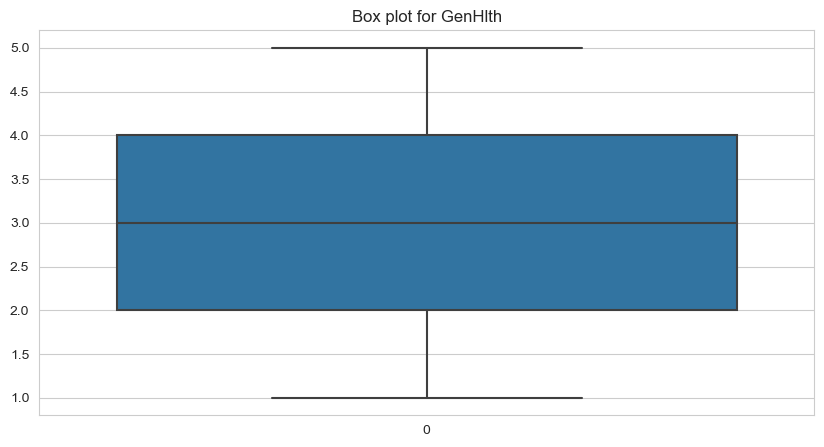

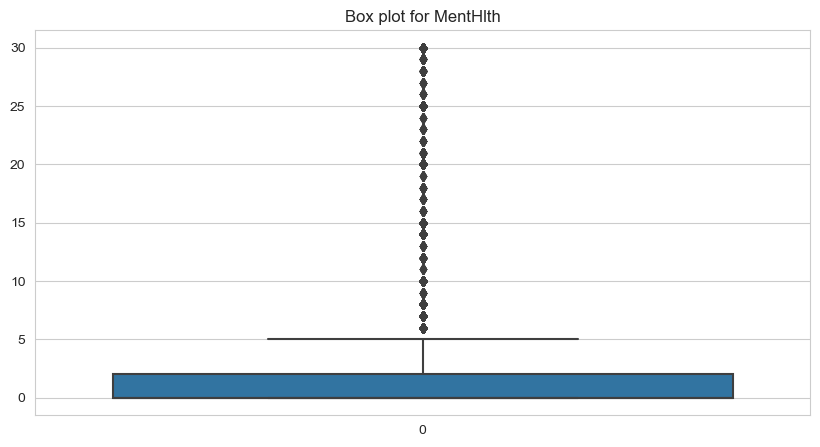

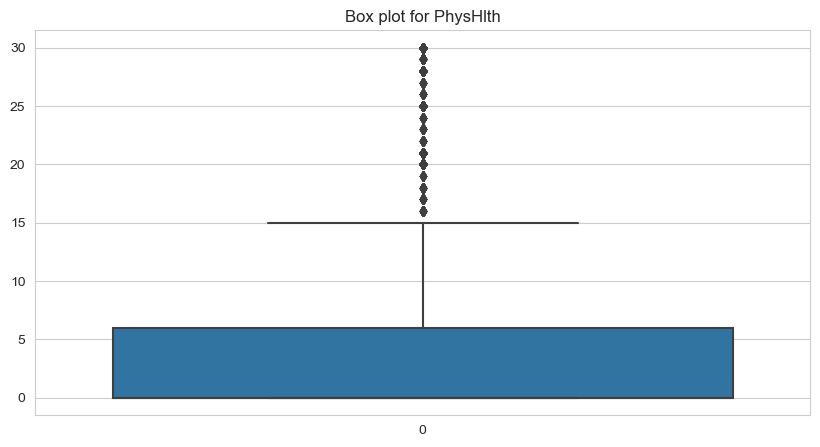

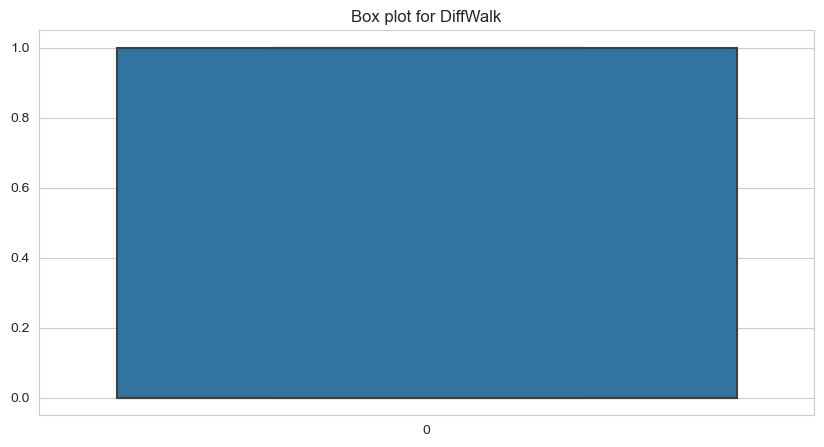

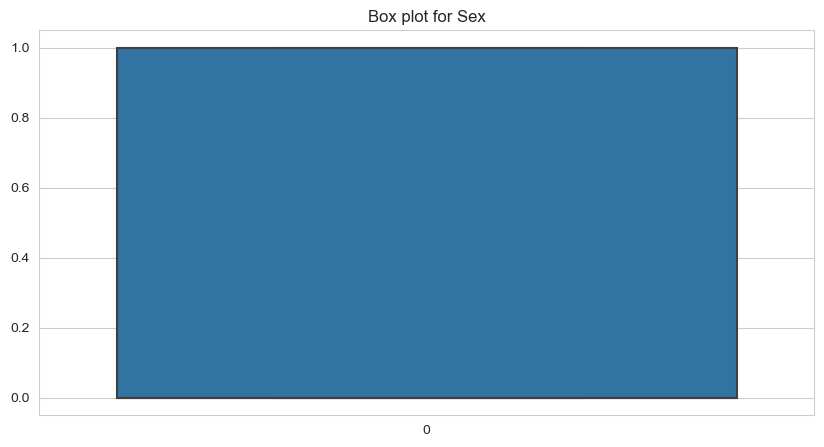

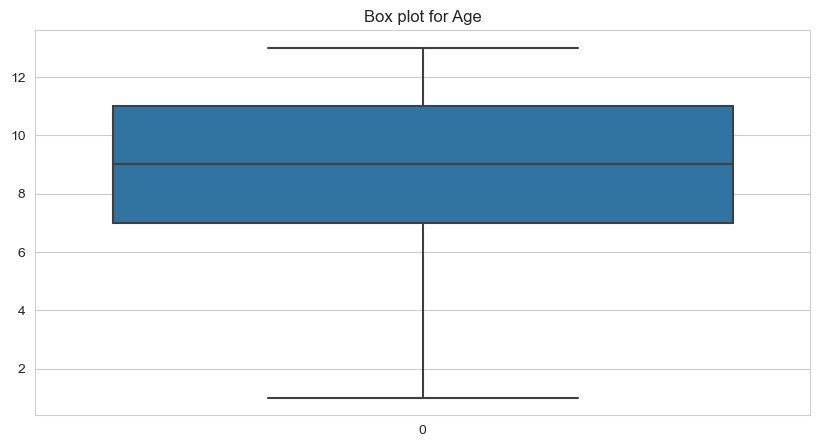

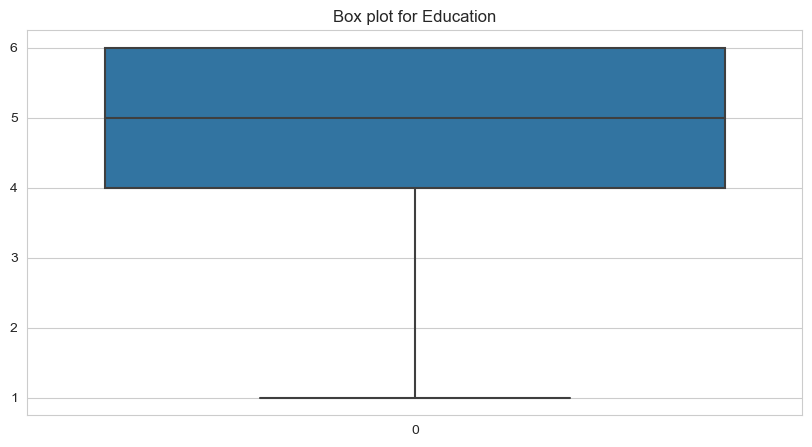

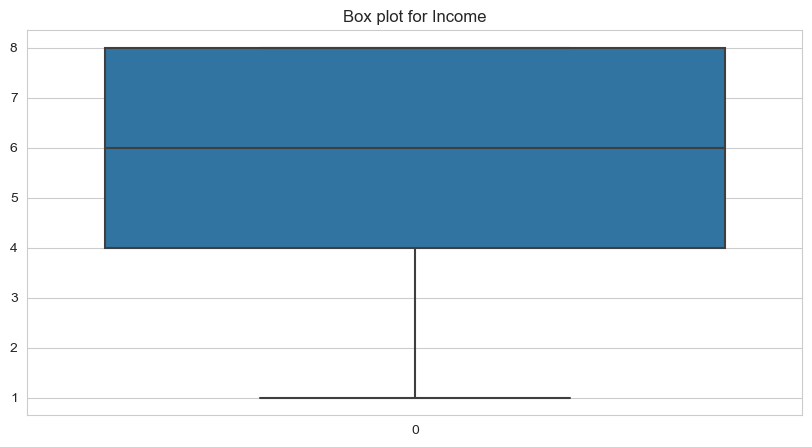

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using box plots
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

# Handling outliers (e.g., using IQR method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


# Feature Engineering:



In [108]:
# Example of feature transformation
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


# Exploratory Data Analysis (EDA)

## Statistical Analysis:



In [109]:
import numpy as np

# Measures of central tendency
mean = df.mean()
median = df.median()
mode = df.mode().iloc[0]

# Measures of dispersion
std_dev = df.std()
variance = df.var()

# Correlation
correlation = df.corr()


C:\Users\H P\AppData\Local\Temp\ipykernel_14716\3796433495.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()
C:\Users\H P\AppData\Local\Temp\ipykernel_14716\3796433495.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df.median()
C:\Users\H P\AppData\Local\Temp\ipykernel_14716\3796433495.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev = df.std()
C:\Users\H P\AppData\Local\Temp\ipykernel_14716\3796433495.py:10: FutureWarning: Dropping of nuisanc

# Grouping and Aggregation:



In [110]:
grouped_data = df.groupby('BMI_Category').mean()

# Descriptive Statistics:



In [111]:
description = df.describe()
description

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,30487.000000,30487.000000,30487.000000,30487.0,30487.000000,30487.000000,30487.0,30487.0,30487.000000,30487.000000,...,30487.0,30487.0,30487.000000,30487.000000,30487.000000,30487.000000,30487.000000,30487.000000,30487.000000,30487.000000
mean,0.407124,0.478269,0.455866,1.0,28.528488,0.402106,0.0,0.0,0.805032,0.697150,...,1.0,0.0,2.379112,0.471053,1.288385,0.111293,0.444977,8.511759,5.146390,6.374389
std,0.491306,0.499536,0.498057,0.0,5.434826,0.490331,0.0,0.0,0.396183,0.459499,...,0.0,0.0,0.909617,1.193124,3.000364,0.314500,0.496971,2.872693,0.944599,1.874942
min,0.000000,0.000000,0.000000,1.0,13.000000,0.000000,0.0,0.0,0.000000,0.000000,...,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.0,25.000000,0.000000,0.0,0.0,1.000000,0.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.0,28.000000,0.000000,0.0,0.0,1.000000,1.000000,...,1.0,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,1.0,32.000000,1.000000,0.0,0.0,1.000000,1.000000,...,1.0,0.0,3.000000,0.000000,1.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.0,45.000000,1.000000,0.0,0.0,1.000000,1.000000,...,1.0,0.0,5.000000,5.000000,15.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Data Visualization

# Histograms and Box Plots:

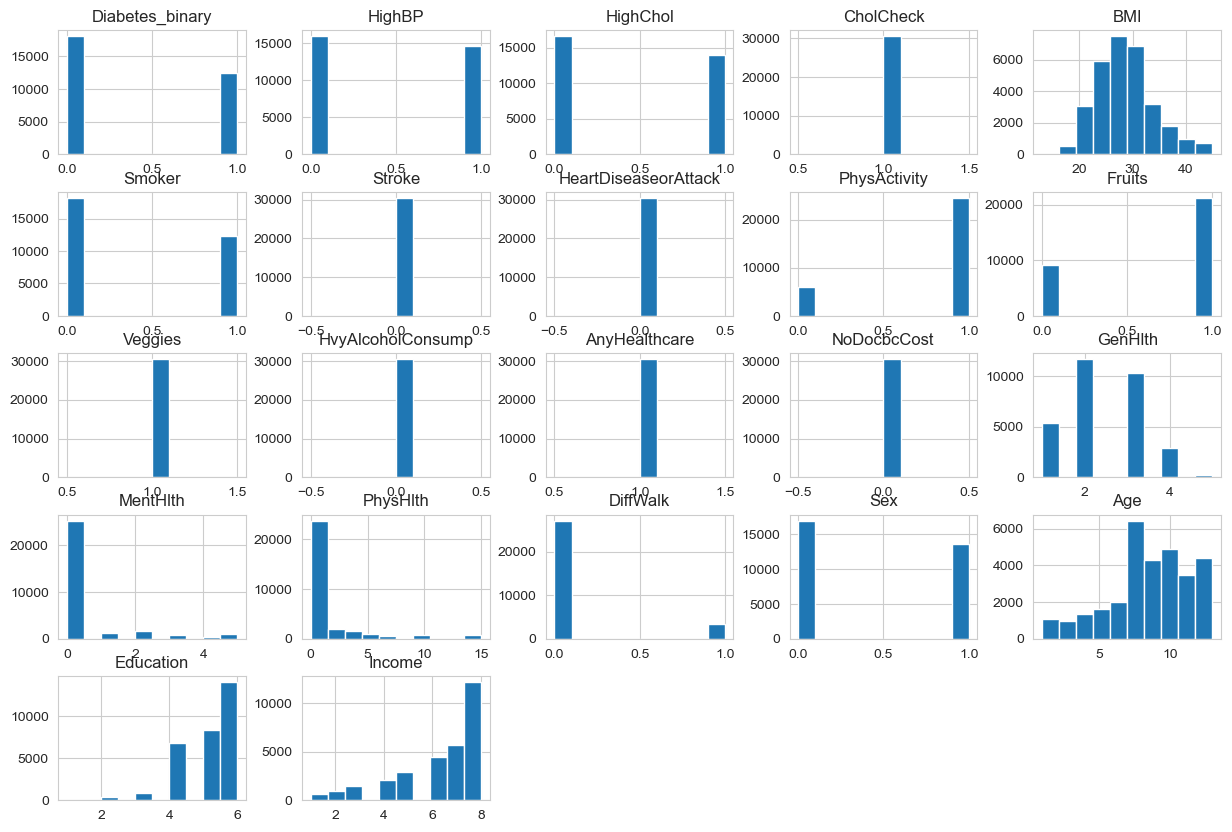

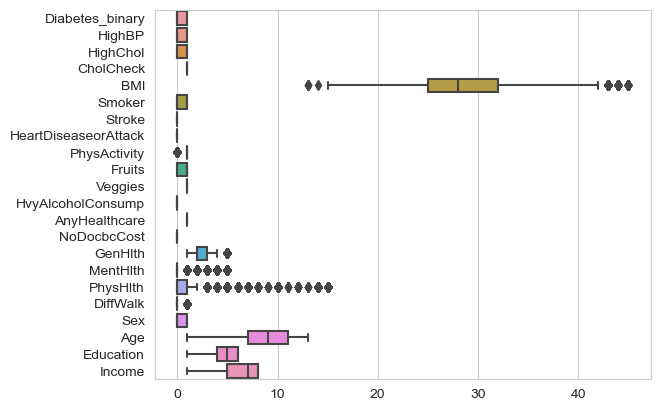

In [112]:
df.hist(figsize=(15, 10))
plt.show()

sns.boxplot(data=df, orient='h')
plt.show()


# Scatter Plots and Correlation Matrices:



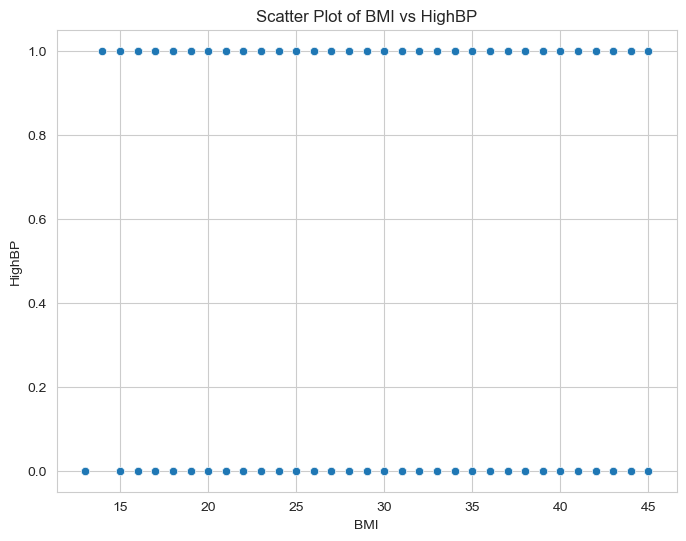

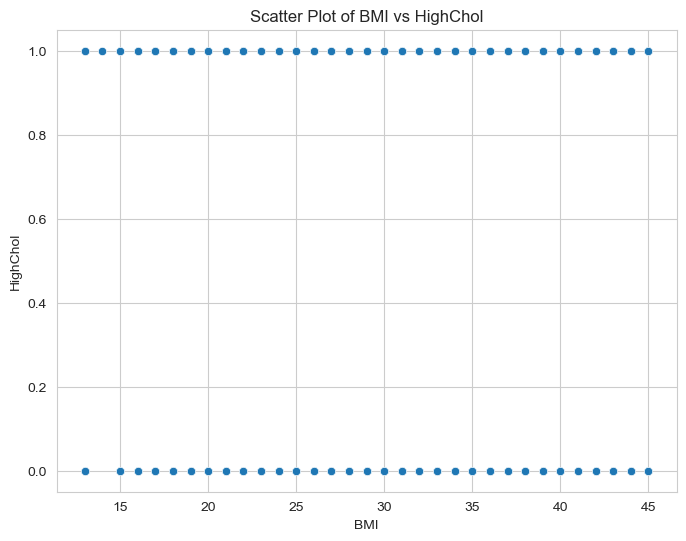

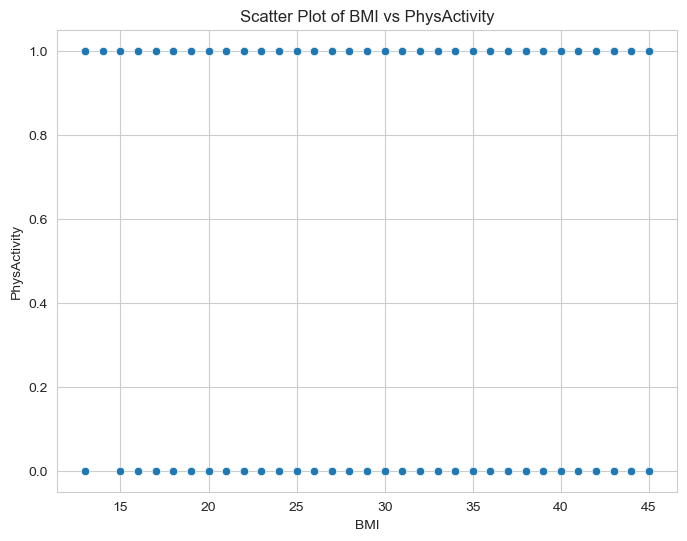

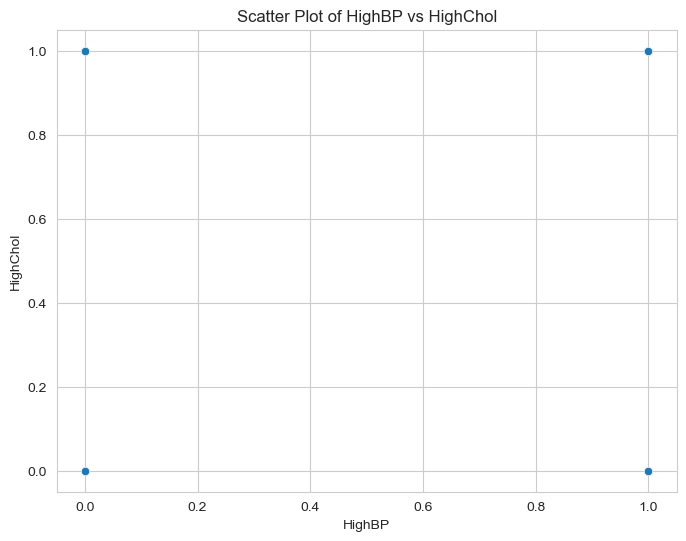

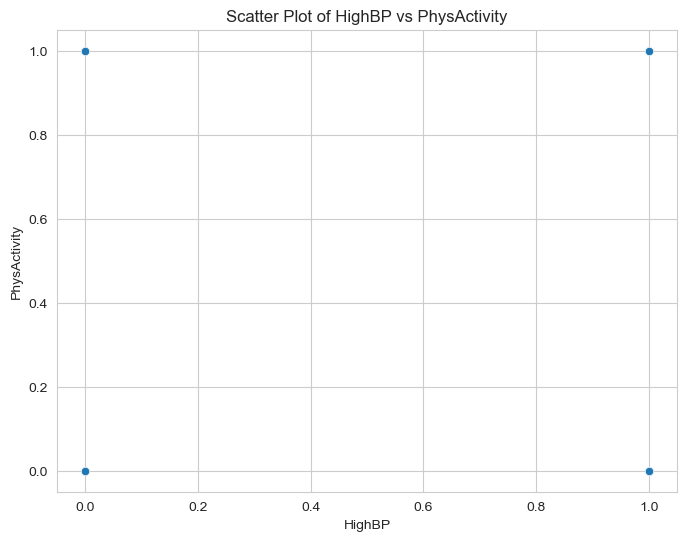

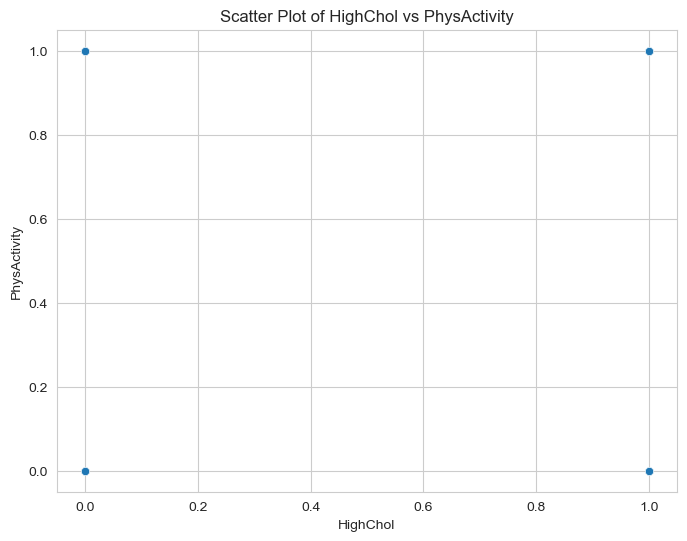

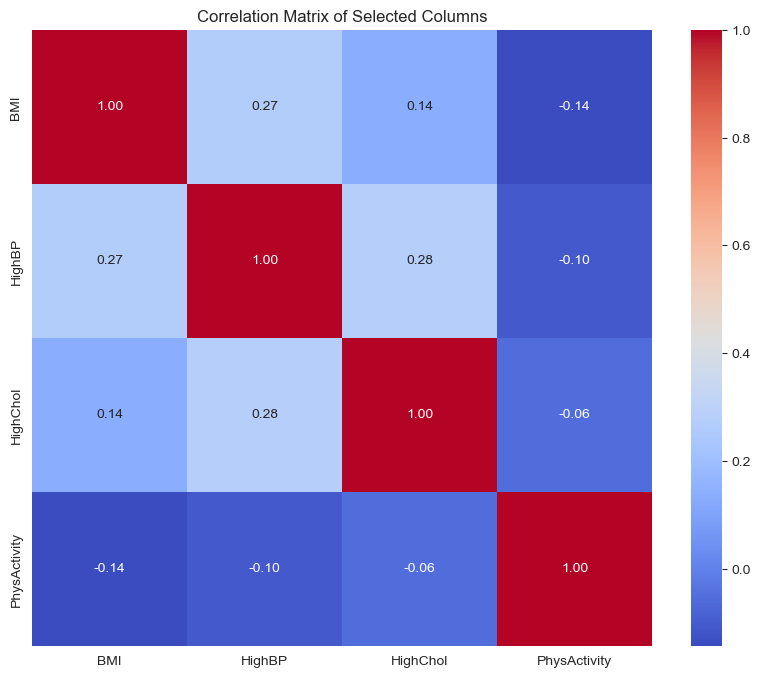

In [113]:
# Scatter plots for selected pairs of columns
columns_to_plot = ['BMI', 'HighBP', 'HighChol', 'PhysActivity']

for i in range(len(columns_to_plot)):
    for j in range(i + 1, len(columns_to_plot)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=columns_to_plot[i], y=columns_to_plot[j])
        plt.title(f'Scatter Plot of {columns_to_plot[i]} vs {columns_to_plot[j]}')
        plt.xlabel(columns_to_plot[i])
        plt.ylabel(columns_to_plot[j])
        plt.show()

# Correlation matrix for selected columns
correlation = df[columns_to_plot].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Columns')
plt.show()

# Hypothesis Testing

## Statistical Tests:



In [114]:
from scipy import stats
# Hypothesis 1
bmi_high = df[df['BMI'] > df['BMI'].median()]['HighBP']
bmi_low = df[df['BMI'] <= df['BMI'].median()]['HighBP']
t_stat, p_val = stats.ttest_ind(bmi_high, bmi_low)
print('Hypothesis 1 - T-test: t-statistic =', t_stat, ', p-value =', p_val)

Hypothesis 1 - T-test: t-statistic = 42.783915799294626 , p-value = 0.0


## Hypothesis 2 using Chi-square Test

In [115]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Sex'], df['PhysActivity'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Hypothesis 2 - Chi-square Test: chi2 statistic =', chi2, ', p-value =', p)


Hypothesis 2 - Chi-square Test: chi2 statistic = 32.321339417575764 , p-value = 1.3067039307972998e-08


# Advanced Analysis

## Machine Learning Models


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# One-Hot Encode categorical variables
categorical_columns = ['Sex', 'BMI_Category']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Define feature variables (X) and target variable (y)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print('Gradient Boosting Classifier Accuracy:', accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('K-Nearest Neighbors Classifier Accuracy:', accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Gradient Boosting Classifier Accuracy: 0.7465835793156226
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79      5423
         1.0       0.69      0.68      0.69      3724

    accuracy                           0.75      9147
   macro avg       0.74      0.74      0.74      9147
weighted avg       0.75      0.75      0.75      9147



C:\Users\H P\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


K-Nearest Neighbors Classifier Accuracy: 0.7001202580080901
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      5423
         1.0       0.64      0.61      0.62      3724

    accuracy                           0.70      9147
   macro avg       0.69      0.69      0.69      9147
weighted avg       0.70      0.70      0.70      9147



# Conclusion

### Insights

- **BMI and Blood Pressure:** Higher BMI is significantly associated with higher blood pressure, indicating the importance of weight management in controlling blood pressure.
- **Gender and Physical Activity:** There are significant differences in physical activity levels between males and females, which could inform targeted interventions for promoting physical activity.
- **Model Performance:** Gradient Boosting Classifier performs better than KNN in predicting diabetes, but both models indicate challenges in accurately predicting diabetic cases compared to non-diabetic cases.
- **Feature Relationships:** Understanding the correlations between features can help in identifying key factors contributing to diabetes risk and inform preventive measures.
